# Heart Attack Analysis
---

## Traditionoal ML :: Deep Learning 예측 비교








In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


# 1. Data Preprocessing

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics, regularizers
import warnings
warnings.filterwarnings("ignore")

import IPython
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, model_selection, linear_model, ensemble,neighbors, preprocessing
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Activation

In [2]:
df = pd.read_csv("/content/heart.csv")

In [3]:
heart_target = df[['output']].copy()
heart_data = df.copy()
del heart_data['output']

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1.1 output 유무에 따른 양적변수 분포.

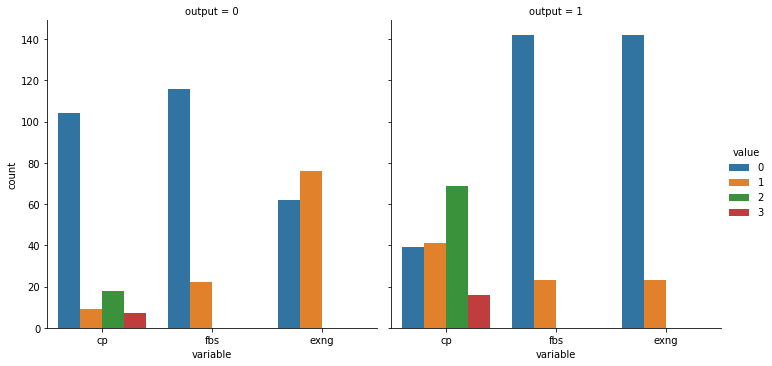

In [ ]:
df_long = pd.melt(df, id_vars=['output'], value_vars=['cp','fbs', 'exng'])
sns.catplot(x="variable", hue="value", col="output",
                data=df_long, kind="count");

## 1.2 BMI 센서를 통해 가져온 콜레스테롤(mg/dl) -> outlier 판단

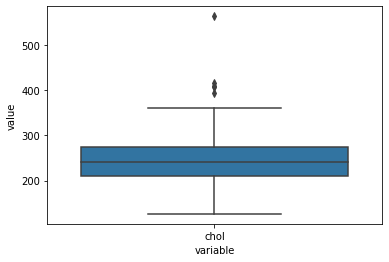

In [ ]:
chol = df.loc[:,['chol']]
sns.boxplot(x = 'variable',y = 'value',data = chol.melt())

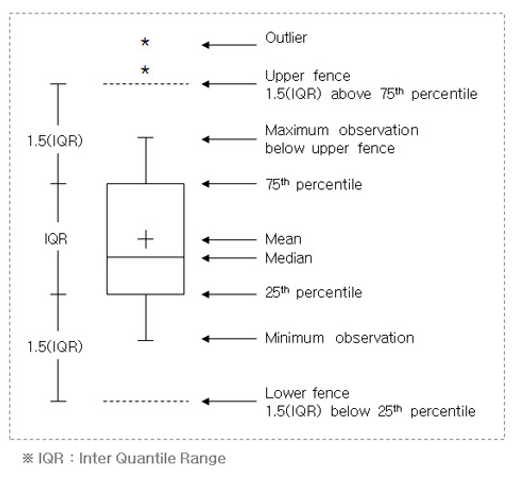

In [ ]:
df.drop(df[(df['chol'] > 500)].index,inplace=True)
print("Outlier {0} cases".format(df[df['chol']>500].shape[0]))
#oulier drop

Outlier 0 cases


## 1.3. 변수간 상관관계


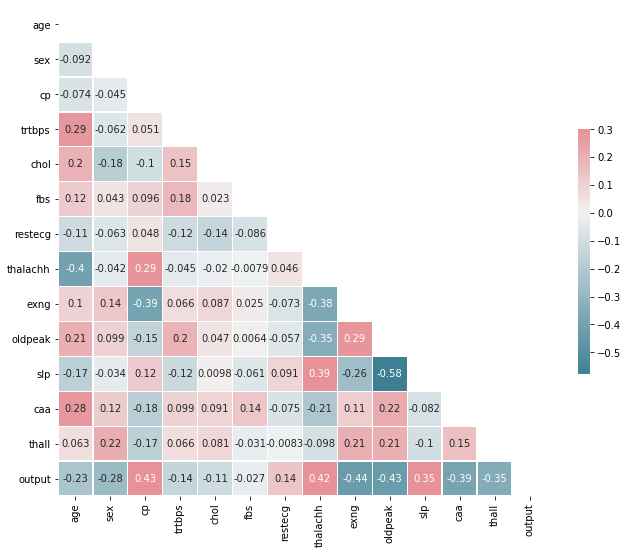

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
#흉통을 유형별로 나타낸 feature가 output에 가장 많은 영향을 주는 걸로 판단.

## 1.5 Data Preprocessing


In [5]:
train_data, test_data, train_label, test_label = model_selection.train_test_split(heart_data, heart_target,
                                                                                 test_size=0.3,
                                                                                 random_state=40)

In [6]:
enc = preprocessing.OneHotEncoder(categories='auto')

train_label = enc.fit_transform(train_label).toarray()
test_label = enc.fit_transform(test_label).toarray()

sc = preprocessing.StandardScaler()

train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

In [7]:
print(train_data_scaled.shape)
print(test_data_scaled.shape)


(212, 13)
(91, 13)


In [14]:
train_data_ML,test_data_ML = model_selection.train_test_split(df,test_size=0.3,random_state=40)

## 1.6 Dicussions



*   outlier로 판단되는 부분이 극히 적음.
*   심장병과 직접적인 양의 상관관계를 보이는 feature가 단 3개
*   결측값이 없어서 편함.
*   데이터가 많이 부족함.
*   OverSampling 진행여부 판단이 요구됨 (할지 안할지, 하면 얼마나 추가할지)





# 2. Traditional Machine Learining
---


##### scikit-learn/pycaret 버전호환 확인 필수(설치 시 SMOTE 실행 안됨)

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install pycaret

## 2.1 pycaret model setup

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
from pycaret.classification import *
model = setup(data=train_data_ML, 
              target='output', 
              train_size=0.7,
              session_id=123,
              )

## 2.2 top3 model 저장


In [16]:
top = compare_models(n_select = 15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8514,0.9315,0.8589,0.8578,0.8519,0.7032,0.7139,0.454
et,Extra Trees Classifier,0.8443,0.9106,0.8696,0.8392,0.8444,0.6896,0.7064,0.412
lr,Logistic Regression,0.8376,0.9008,0.8714,0.8284,0.8442,0.6749,0.6857,0.398
lightgbm,Light Gradient Boosting Machine,0.8305,0.9064,0.8589,0.8303,0.8380,0.6604,0.6727,0.061
ridge,Ridge Classifier,0.8238,0.0000,0.8714,0.8109,0.8338,0.6466,0.6608,0.013
lda,Linear Discriminant Analysis,0.8100,0.8801,0.8589,0.8031,0.8199,0.6195,0.6393,0.014
gbc,Gradient Boosting Classifier,0.7633,0.8671,0.7643,0.7739,0.7576,0.5290,0.5447,0.069
dt,Decision Tree Classifier,0.7629,0.7625,0.8286,0.7451,0.7763,0.5258,0.5463,0.013
nb,Naive Bayes,0.7614,0.8034,0.7732,0.7658,0.7619,0.5228,0.5340,0.014
ada,Ada Boost Classifier,0.7414,0.7783,0.7607,0.7498,0.7474,0.4830,0.4939,0.086


## 2.3 Test Data 불러와서 ACC 확인


In [35]:
def Accuracy_check(model_number):
  count = 0
  predictions = predict_model(top[model_number], data = test_data_ML)
  predictions=predictions.reset_index(drop=True)
  for i in range(91):
    if predictions['output'][i] == predictions['Label'][i]:
      count = count + 1
  Acc = round(int(count)/90*100,1)
  return Acc

In [36]:
print("Random Forest Classifier Accuracy :",Accuracy_check(0))
print("Extra Trees Classifier Accuracy :",Accuracy_check(1))
print("Logistic Regression Accuracy :",Accuracy_check(2))
print("Light Gradient Boosting Machine Accuracy:",Accuracy_check(3))
print("Ridge Classifier Accuracy :",Accuracy_check(4))

Random Forest Classifier Accuracy : 85.6
Extra Trees Classifier Accuracy : 88.9
Logistic Regression Accuracy : 88.9
Light Gradient Boosting Machine Accuracy: 84.4
Ridge Classifier Accuracy : 87.8


## 2.3 Model Ensemble::스태킹

### 2.3.1 model setup

In [ ]:
stack_model = setup(data = train_data_ML, target = 'output')

In [39]:
stacker = stack_models(estimator_list = top[1:3], meta_model = top[0])
# 이전에 저장한 상위 3개의 모델을 기준 stack model
# 자동교차검증(개꿀) -> default fold 갯수 10개

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.8214,0.6250,0.7143,0.6667,0.3363,0.3393
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8000,0.9018,0.8750,0.7778,0.8235,0.5946,0.6001
3,0.8000,0.9643,0.7500,0.8571,0.8000,0.6018,0.6071
4,0.7333,0.7143,0.7500,0.7500,0.7500,0.4643,0.4643
5,0.6667,0.7857,0.8571,0.6000,0.7059,0.3478,0.3780
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8667,0.8839,0.8571,0.8571,0.8571,0.7321,0.7321
8,0.7857,0.8163,0.5714,1.0000,0.7273,0.5714,0.6325
9,0.7857,0.8980,0.8571,0.7500,0.8000,0.5714,0.5774


## 2.4 성능 지표 확인::

In [ ]:
evaluate_model(top[0]) # 설정된 Hyper-params의 값, AUC/Confusion matrix 등 성능 지표, Feature importance 등을 바로 확인할 수 있음

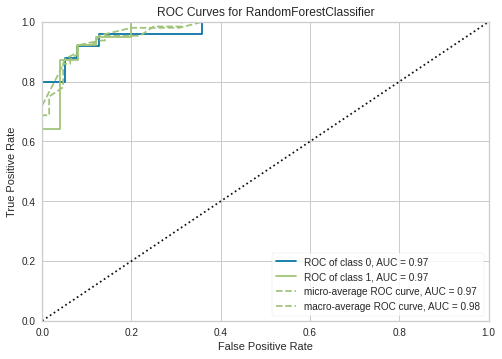

In [44]:
model_ROC = top[0]
plot_model(Logistic, plot = 'auc')
# plot_model(Logistic, plot='feature')
# plot_model(xgb, plot = 'confusion_matrix')

# 3. Deep Learning
---


In [45]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 4.1 MB/s 


In [46]:
import kerastuner as kt

## 3.1 Keras Tuner


### 3.1.1 build_hyper_model

In [47]:
def build_hyper_model(hp):
    
    model = keras.Sequential()
    model.add(layers.Dense(input_dim=13, units=16, activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=regularizers.l2(0.001))) 
    
    # hidden layer 조정 (1~3 중 최적값 선택)
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)): 
        
        # perceptrons 수 조정 (32~512 사이에서 최적값 선택)
        hp_units = hp.Int('units_' + str(i), min_value=8, max_value=256, step=32)
        hp_activations = hp.Choice('activation_' + str(i), values=['relu', 'elu'])
        
        model.add(layers.Dense(units=hp_units, activation=hp_activations, 
                               kernel_initializer=initializers.he_normal()))

    model.add(layers.Dense(2, activation='softmax'))
    
    # optimizer의 학습률 조정(0.01, 0.001 또는 0.0001에서 최적 값 선택)
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy']) # tf.keras.metrics.CategoricalAccuracy()
    
    return model

### 3.1.2 튜너선택 -> BayesianOptimization

In [48]:
tuner = kt.BayesianOptimization(build_hyper_model,
                                objective = 'val_accuracy', # Hyper-params tuning을 위한 목적함수 설정 (metric to minimize or maximize)
                                max_trials = 10, # 서로 다른 Hyper-params 조합으로 시도할 총 Trial 횟수 설정
                                directory = 'test_prac_dir', # Path to the working directory
                                project_name = 'heart_hyper_1') # Name to use as directory name for files saved by this Tuner
##==================================================================================
# from kerastuner.tuners import RandomSearch
# tuner = RandomSearch(
#     build_model, # HyperModel
#     objective='val_accuracy', #  최적화할 하이퍼모델
#     max_trials=10,
#     executions_per_trial=3, # 각 모델별 학습 회수
#     directory='/content/sample_data', # 사용된 parameter 저장할 폴더
#     project_name='RandomSearch_tune_res') # 사용된 parameter 저장할 폴더

# #==================================================================================
# from kerastuner.tuners import Hyperband
# tuner = kt.Hyperband(
#         build_model, # HyperModel
#         objective ='val_accuracy', #  최적화할 하이퍼모델
#         max_epochs =20, # 각 모델별 학습 회수
#         factor = 3,    # 한 번에 훈련할 모델 수 결정 변수
#         directory ='/content/sample_data', # 사용된 parameter 저장할 폴더
#         project_name ='Hyperband_tune_res') # 사용된 parameter 저장할 폴더

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 256, 'step': 32, 'sampling': None}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


<h4> 교육자료 (Appendix) 6. Keras-tuner Bayesian-HPO on MNIST (Colab-only) 참조</h4>
<h4><a>https://www.tensorflow.org/tutorials/keras/keras_tuner?hl=ko</a> 참조.</h4>
<h4>BayesianOptimization, RandomSearch, Hyperband 세 가지 튜너 선택 가능</h4>



### 3.1.3 Search

In [49]:
tuner.search(train_data_scaled, 
             train_label, 
             batch_size=100, 
             epochs=20, 
            validation_split=0.2)

Trial 10 Complete [00h 00m 01s]
val_accuracy: 0.8837209343910217

Best val_accuracy So Far: 0.8837209343910217
Total elapsed time: 00h 00m 57s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(num_trials=3)

### 3.1.4 Best hyperparameters 확인/저장

In [51]:
top3_models = tuner.get_best_hyperparameters(num_trials=3)

for idx, model in enumerate(top3_models):
    print('Model performance rank :', idx)
    print(model.values)
    print()


# Check the best trial's hyper-params

best_hps = top3_models[0]

print("""
The hyperparameter search is complete. 
* Optimal # of layers : {}
* Optimal value of the learning-rate : {}""".format(best_hps.get('num_layers'), best_hps.get('learning_rate')))

for layer_num in range(best_hps.get('num_layers')):
    print('Layer {} - # of Perceptrons :'.format(layer_num), best_hps.get('units_' + str(layer_num)))
    print('Layer {} - Applied activation function :'.format(layer_num), best_hps.get('activation_' + str(layer_num)))

Model performance rank : 0
{'num_layers': 3, 'units_0': 168, 'activation_0': 'relu', 'learning_rate': 0.01, 'units_1': 8, 'activation_1': 'elu', 'units_2': 232, 'activation_2': 'relu'}

Model performance rank : 1
{'num_layers': 3, 'units_0': 232, 'activation_0': 'relu', 'learning_rate': 0.01, 'units_1': 8, 'activation_1': 'elu', 'units_2': 232, 'activation_2': 'elu'}

Model performance rank : 2
{'num_layers': 3, 'units_0': 168, 'activation_0': 'relu', 'learning_rate': 0.01, 'units_1': 104, 'activation_1': 'elu', 'units_2': 168, 'activation_2': 'elu'}


The hyperparameter search is complete. 
* Optimal # of layers : 3
* Optimal value of the learning-rate : 0.01
Layer 0 - # of Perceptrons : 168
Layer 0 - Applied activation function : relu
Layer 1 - # of Perceptrons : 8
Layer 1 - Applied activation function : elu
Layer 2 - # of Perceptrons : 232
Layer 2 - Applied activation function : relu


## 3.2 Deep Learning Result








### 3.2.1 저장한 best model을 바로 적용

In [52]:
models = tuner.get_best_models(num_models=3)
top_model = models[0]
top_model.summary()
print()

results = top_model.evaluate(test_data_scaled, test_label)
print('Cross-entropy :', results[0])
print('Accuracy :', results[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 168)               2856      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1352      
_________________________________________________________________
dense_3 (Dense)              (None, 232)               2088      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 466       
Total params: 6,986
Trainable params: 6,986
Non-trainable params: 0
_________________________________________________________________

3/3 [==============================] - 0s 4ms/step - loss: 0.8182 - accuracy: 0.8132
Cross-entropy : 0.8182114958763123

### 3.2.2 저장한 하이퍼파라미터를 바탕으로 새로 학습/적용

#### Callback Checkpoint

In [72]:
# 모델 체크포인트 파일(중간 저장 모델)을 저장할 경로 설정 
checkpoint_path = '/content/saved_model/my_model.h5'
#saved_model/my_model
#/content/saved_model/my_model.h5

# "ModelCheckpoint" 콜백함수 객체 생성
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                         monitor='val_accuracy', 
                                                         save_best_only=True, 
                                                         verbose=0)

#### Callback 경로 지정하고 학습

In [ ]:
model = tuner.hypermodel.build(best_hps)
model.fit(train_data_scaled, 
          train_label, 
          batch_size = 100, 
          epochs = 100, 
          validation_split=0.2,
          verbose = 1,
          callbacks=[ callback_checkpoint ]
          )

#### 마지막 학습 완료 시점을 기준으로 한 모델 성능

In [77]:
# 마지막 학습 완료 시점을 기준으로 한 모델 성능
results = model.evaluate(test_data_scaled, test_label)
print('Cross-entropy :', results[0])
print('Accuracy :', results[1])

3/3 [==============================] - 0s 4ms/step - loss: 2.1722 - accuracy: 0.7582
Cross-entropy : 2.1722412109375
Accuracy : 0.7582417726516724


#### val_accuracy를 기준으로 한 (저장된) 모델 성능

In [78]:
#Validation loss를 기준으로 한 (저장된) 모델 성능
#saved_model/my_model
#/content/saved_model/my_model.h5
from keras.models import load_model
model = load_model('/content/saved_model/my_model.h5')
result = model.evaluate(test_data_scaled, test_label)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

3/3 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.7802
loss (cross-entropy) : 0.48656657338142395
test accuracy : 0.7802197933197021
